### 경희대학교 산업경영공학과 김태호(2015100915)

# 지난 1년간 서울시 공공자전거 대여소별 이용 분석 

## (1) 주제 선정 이유

  서울시를 돌아다니다보면 따릉이를 타고있는 사람을 보거나 진열된 따릉이를 보거나 대여소를 보는등 서욿시에서 하는 공공자전거 사업인 따릉이를 쉽게 볼 수 있다. 따릉이는 서울시의 친환경사업과 함께 시민들의 더욱더 편한 이동수단을 제공하기 위해 2015년부터 현재까지 계속 이루어지고 있는 사업이다. 실제로 시민들은 가까운거리를 가거나 출퇴근, 산책, 운동을 하는 등 여러 방면에서 따릉이를 이용하고 있다.<br>
  과거에 비해 점점 좋아지고 있기는 하지만 여전히 이용자에 비해 자전거의 수가 턱없이 부족한 실정이다. 이러한 문제를 해결하기 위해서 서울시는 몰려있는 따릉이 부족한곳에 분배시켜주는 따릉이 분배팀을 운영하고 있다. 따릉이분배팀의 원활한 운영을 위해서 자전거를 시간대별, 위치별 이용량을 분석하여 어느곳이 부족한지 알아보고 자전거를 효과적으로 배치해야 한다. 지금부터 서울시에서 제공 따릉이에 관련 데이터를 이용하여 시민들의 이용경향을 분석하고 어디가 언제 부족한지를 분석하여 어떻게 따릉이를 효과적으로 분배해야하는지 생각해 볼 것 이다.

## (2) 가설 정의

지난 1년간 서울시 공공자전거를 대여소별 데이터로 분석하여 시민들의 이용경향을 분석하여 서울시 공공자전거 사업이 잘 운영될 수 있도록 효율적인 따릉이분배방법을 생각해 본다.

## (3) 인터넷을 통한 데이터 획득

- 정부 3.0 공공 데이터 : http://www.data.go.kr/


- 서울시 열린 데이터 광장 : http://data.seoul.go.kr/

위의 두 페이지에 서울시 공공자전거에 대한 대여소별 월간 이용정보, 시간대별 이용정보를 csv형태의 파일로 얻어서 사용하는 목적에 맞게 가공하였다. 

## (4) 분석을 위한 데이터의 가공

### 1. 서울시 공공자전거 사업 17년, 18년 비교 데이터 가공

In [1]:
import pandas as pd 
import numpy as np 

#### 서울시 공공자전거 대여소 데이터가공

In [2]:
Bike_Stop = pd.read_csv('../raw data/서울시_공공자전거_대여소_정보.csv', engine='python') 
Bike_Stop.head()

,구분,대여소번호,대여소명,대여소 주소,거치대수,위도,경도
0,강남구,2301,현대고등학교 건너편,서울특별시 강남구 압구정로 134,10,37.524071,127.021790
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),서울특별시 강남구 봉은사로 지하 102,10,37.505581,127.024277
2,강남구,2303,논현역 7번출구,서울특별시 강남구 학동로 지하 102,15,37.511517,127.021477
3,강남구,2304,신영 ROYAL PALACE 앞,서울특별시 강남구 언주로 626,10,37.512527,127.035835
4,강남구,2305,MCM 본사 직영점 앞,서울특별시 강남구 언주로 734,10,37.520641,127.034508


다른 데이터와 비교하기 쉽게 unique 한 열인 '대여소번호'를 기준으로 오름차순 정렬 후 index를 다시 설정했다.

In [3]:
Bike_Stop = Bike_Stop.sort_values(by="대여소번호", ascending=True) # 대여소번호를 기준으로 오름차순 정렬 
Bike_Stop = Bike_Stop.reset_index(drop='True') # index를 다시 설정
Bike_Stop.head()

,구분,대여소번호,대여소명,대여소 주소,거치대수,위도,경도
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5,37.549561,126.905754
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20,37.556000,126.910454
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14,37.554951,126.910835
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13,37.550629,126.914986
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5,37.550007,126.914825


#### 서울특별시 공공자전거 대여소별 이용정보(17년 상반기) 데이터 가공

In [4]:
Bike_Month = pd.read_csv('../raw data/서울특별시 공공자전거 대여소별 이용정보(월간)_2017_1_12.csv', engine='python')
Bike_Month.head()

,'대여일자','대여소번호','대여소','대여건수','반납건수'
0,'201701','108',' 서교동 사거리',246,198
1,'201701','503',' 더샵스타시티 C동 앞',246,224
2,'201701','504',' 신자초교입구교차로',232,261
3,'201701','505',' 자양사거리 광진아크로텔 앞',302,313
4,'201701','506',' 금호 어울림 아파트 앞',72,77


상반기의 데이터만 필요하기때문에 17년도 상반기의 데이터만 Bike_Month에 복사한다.

In [5]:
Bike_Month = Bike_Month[Bike_Month["'대여일자'"] < "'201707'"].copy()#상반기의테이터만 저장
Bike_Month.tail()

,'대여일자','대여소번호','대여소','대여건수','반납건수'
3067,'201706','415',' DMC역 9번출구 앞',1929,1607
3068,'201706','416',' 상암월드컵파크 1단지 교차로',980,510
3069,'201706','500',' 어린이대공원역 3번출구 앞',1858,1673
3070,'201706','501',' 광진구의회 앞',2354,2407
3071,'201706','502',' 뚝섬유원지역 1번출구 앞',4242,4840


'대여소' 열과 '대여일자'열은 분석에 필요없는 요소가 있기 때문에 삭제한다.

In [6]:
del Bike_Month["'대여일자'"] # '대여일자'열을 삭제
del Bike_Month["'대여소'"] # '대여소'열을 삭제
Bike_Month.head()

,'대여소번호','대여건수','반납건수'
0,'108',246,198
1,'503',246,224
2,'504',232,261
3,'505',302,313
4,'506',72,77


데이터가 월별로 나와 있는데 월별데이터를 원하는 것이 아니라 상반기 통합데이터를 원하고 있다.<br>
띠라서 '대여소번호'를 기준으로 통합하여 '대여건수', '반납건수'의 합계를 나타낸다.  

In [7]:
grouped = Bike_Month[["'대여건수'","'반납건수'"]].groupby(Bike_Month["'대여소번호'"]) 
Bike_Month_cumsum = grouped.sum()  # '대여소번호'를 기준으로 그룹화하여 합산을 Bike_Month_cumsum에 대입한다.
Bike_Month_rent = Bike_Month.drop_duplicates(["'대여소번호'"])[["'대여소번호'"]]      
Bike_Month_rent = Bike_Month_rent.sort_values(by="'대여소번호'")  # Bike_Month_rent에 '대여소번호'를 기준으로 정렬한다.
Bike_Month_cumsum = Bike_Month_cumsum.reset_index(drop='True')                          
Bike_Month_rent = Bike_Month_rent.reset_index(drop='True')   #index를 재설정 한다.
Bike_Month = pd.concat([Bike_Month_rent, Bike_Month_cumsum], axis=1) # Bike_Month_rent와 Bike_Month_cumsum을 합친다.
Bike_Month.head()

,'대여소번호','대여건수','반납건수'
0,'1001',1410,1314
1,'1002',589,755
2,'1003',679,764
3,'1004',833,1119
4,'1006',831,792


In [8]:
Bike_Month.tail()

,'대여소번호','대여건수','반납건수'
694,'933',2377,2742
695,'상암센터 정비실',40,70
696,'위트콤',158,153
697,'위트콤공장',34,29
698,'중랑센터',70,65


'데이터번호'열에 번호가 아닌 필요없는 데이터가 있어서 없애준다

In [9]:
Bike_Month.drop([695], inplace=True) 
Bike_Month.drop([696], inplace=True)
Bike_Month.drop([697], inplace=True)
Bike_Month.drop([698], inplace=True) # 행을 삭제함
Bike_Month.tail()

,'대여소번호','대여건수','반납건수'
690,'928',642,523
691,'930',723,791
692,'931',3202,4155
693,'932',2249,2293
694,'933',2377,2742


열의 이름을 알아보기 쉽게 바꾸고 '회수율'이라는 열을 추가한다.<br>
회수율은 대여건수와 반납건수를 비교하기 위한 열이다.
##### 회수율 = '(반납건수 -대여건수) / 100'
회수율이 클수록 반납되는 자전거가 더 많아 자전거가 쌓여있고, 회수율이 작을수록 대여되는 자전거가 더 많아 자전거가 부족할 확률이 높다. <br>
'서울시 공공자전거 대여소' 데이터의 '대여소번호'값과 형태를 같게 하여 두 데이터를 병합하기 쉽게 한다. <br>

In [10]:
Bike_Month.rename(columns={Bike_Month.columns[0] : '대여소번호', 
                          Bike_Month.columns[1] : '17년_대여건수', 
                          Bike_Month.columns[2] : '17년_반납건수'}, inplace=True) # 열의 이름을 바꾼다.
Bike_Month['17년_회수율'] = (Bike_Month['17년_반납건수'] - Bike_Month['17년_대여건수'])/100 # '회수율'열을 추가한다.
Bike_Month['대여소번호'] = Bike_Month['대여소번호'].apply(lambda x : int(str(x).rstrip("'").lstrip("'"))) # 번호 양쪽의 ''를 없애고
Bike_Month = Bike_Month.sort_values(by="대여소번호", ascending=True) # '대여소번호'를 기준으로 오름차순 정렬한다.
Bike_Month = Bike_Month.reset_index(drop='True') # index를 재설정한다.
Bike_Month.head()

,대여소번호,17년_대여건수,17년_반납건수,17년_회수율
0,101,1865,2128,2.63
1,102,7492,6758,-7.34
2,103,5494,5399,-0.95
3,104,6147,4876,-12.71
4,105,3920,3176,-7.44


#### 서울특별시 공공자전거 대여소별 이용정보(18년 상반기) 데이터 가공

위의 '서울특별시 공공자전거 대여소별 이용정보(17년 상반기) 데이터 가공' 과정과 같기 때문에 추가 설명은 생략한다..<br>
(18년데이터에는 '데이터번호'열에 번호가 아닌 필요없는 데이터가 없어서 필요없는 행을 삭제하는 과정은 실시하지 않았다.)

In [11]:
Bike_Month_18 = pd.read_csv('../raw data/서울특별시 공공자전거 대여소별 이용정보(월간)_2018_1_6.csv', engine='python')
del Bike_Month_18["'대여일자'"]
del Bike_Month_18["'대여소'"]
grouped = Bike_Month_18[["'대여건수'","'반납건수'"]].groupby(Bike_Month_18["'대여소번호'"])
Bike_Month_18_cumsum = grouped.sum()
Bike_Month_18_rent = Bike_Month_18.drop_duplicates(["'대여소번호'"])[["'대여소번호'"]]
Bike_Month_18_rent = Bike_Month_18_rent.sort_values(by="'대여소번호'")
Bike_Month_18_cumsum = Bike_Month_18_cumsum.reset_index(drop='True')
Bike_Month_18_rent = Bike_Month_18_rent.reset_index(drop='True')
Bike_Month_18 = pd.concat([Bike_Month_18_rent, Bike_Month_18_cumsum], axis=1)
Bike_Month_18.rename(columns={Bike_Month_18.columns[0] : '대여소번호', 
                          Bike_Month_18.columns[1] : '18년_대여건수', 
                          Bike_Month_18.columns[2] : '18년_반납건수'}, inplace=True) 
Bike_Month_18['18년_회수율'] = (Bike_Month_18['18년_반납건수'] - Bike_Month_18['18년_대여건수'])/100
Bike_Month_18['대여소번호'] = Bike_Month_18['대여소번호'].apply(lambda x : int(str(x).rstrip("'").lstrip("'")))
Bike_Month_18 = Bike_Month_18.sort_values(by="대여소번호", ascending=True)
Bike_Month_18 = Bike_Month_18.reset_index(drop='True')
Bike_Month_18.head()

,대여소번호,18년_대여건수,18년_반납건수,18년_회수율
0,101,2263,2247,-0.16
1,102,8735,8364,-3.71
2,103,6111,5748,-3.63
3,104,5835,5333,-5.02
4,105,3692,3047,-6.45


#### 대여소 정보와 년도별 이용정보 데이터 통합

대여소 정보와 년도별 이용정보 데이터를 통합하고 csv형태로 저장한다. <br>
통합하는 이유는 최종보고서에서 시각화를 통해 도출해낼 정보에 대여소 위치 정보와 여러 수치를 비교해야 하기 때문이다.

In [12]:
TotalData_17 = pd.merge(Bike_Stop, Bike_Month, on='대여소번호') # 두 데이터를 병합
TotalData_17['17년_하루평균대여'] = round(TotalData_17['17년_대여건수']/181,2) # 하루평균대여 열을 추가함
TotalData_17.rename(columns={TotalData_17.columns[2] : '17_대여소명'}, inplace = True)
TD_17 = TotalData_17.copy()
TD_17.to_csv('../processing data/17년 서울시 공공자전거 대여소및 이용현황.csv', mode ='w')#가공한 데이터를 csv형태로 저장함
TotalData_17.head()

,구분,대여소번호,17_대여소명,대여소 주소,거치대수,위도,경도,17년_대여건수,17년_반납건수,17년_회수율,17년_하루평균대여
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5,37.549561,126.905754,1865,2128,2.63,10.30
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20,37.556000,126.910454,7492,6758,-7.34,41.39
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14,37.554951,126.910835,5494,5399,-0.95,30.35
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13,37.550629,126.914986,6147,4876,-12.71,33.96
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5,37.550007,126.914825,3920,3176,-7.44,21.66


In [13]:
TotalData_18 = pd.merge(Bike_Stop, Bike_Month_18, on='대여소번호')
TotalData_18['18년_하루평균대여'] = round(TotalData_18['18년_대여건수']/181,2)
TotalData_18.rename(columns={TotalData_18.columns[2] : '18_대여소명'}, inplace = True)
TD_18 = TotalData_18.copy()
TD_18.to_csv('../processing data/18년 서울시 공공자전거 대여소및 이용현황.csv', mode ='w')
TotalData_18.head()

,구분,대여소번호,18_대여소명,대여소 주소,거치대수,위도,경도,18년_대여건수,18년_반납건수,18년_회수율,18년_하루평균대여
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5,37.549561,126.905754,2263,2247,-0.16,12.50
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20,37.556000,126.910454,8735,8364,-3.71,48.26
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14,37.554951,126.910835,6111,5748,-3.63,33.76
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13,37.550629,126.914986,5835,5333,-5.02,32.24
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5,37.550007,126.914825,3692,3047,-6.45,20.40


### 2. 시간대별 대여소 이용건수 데이터 가공 

#### 시간별 대여소 이용건수 데이터 가공

In [14]:
Bike_Time1 = pd.read_excel('../raw data/서울특별시 공공자전거 시간대별 대여정보_201801_02.xlsx') 
Bike_Time1.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-01-01,0,300,정동사거리,정기권,F,~10대,1,37.32,0.34,1450,23
1,2018-01-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,54.83,0.49,2130,15
2,2018-01-01,0,1531,미아사거리 1번 출구,정기권,F,20대,1,78.34,0.73,3140,17
3,2018-01-01,0,516,광진메디칼 앞,정기권,F,20대,1,29.95,0.29,1240,5
4,2018-01-01,0,3508,화양사거리,정기권,F,20대,1,46.09,0.45,1940,43


In [60]:
Bike_Time2 = pd.read_excel('../raw data/서울특별시 공공자전거 시간대별 대여정보_201803_04.xlsx') 
Bike_Time3 = pd.read_excel('../raw data/서울특별시 공공자전거 시간대별 대여정보_201805.xlsx') 
Bike_Time4 = pd.read_excel('../raw data/서울특별시 공공자전거 시간대별 대여정보_201806.xlsx') 

상반기의 데이터만 필요하기 때문에 데이터에서 6월까지의 데이터만 가져온다.
데이터셋을 합쳐 상반기데이터를 완성한다.

In [33]:
Bike_Time = pd.concat([Bike_Time1,Bike_Time2,Bike_Time3,Bike_Time4], ignore_index=True)
Bike_Time.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
2810630,2018-06-30,23,1210,롯데월드타워(잠실역2번출구 쪽),단체권,F,40대,2,135.83,1.59,6860,90
2810631,2018-06-30,23,747,목동3단지 상가,단체권,M,20대,2,225.06,1.78,7680,34
2810632,2018-06-30,23,3509,세종사이버대학교,단체권,M,20대,2,706.57,6.36,27450,216
2810633,2018-06-30,23,1122,황금내근린공원,단체권,M,20대,2,515.21,3.87,16680,97
2810634,2018-06-30,23,170,가재울 뉴타운 주유소 옆,단체권,M,40대,2,329.21,2.97,12790,95


필요없는 데이터를 삭제하고 열의 이름을 바꿔 데이터를 통합하기 편하게 한다.

In [17]:
del Bike_Time["대여일자"] # '대여일자'열을 삭제
del Bike_Time["대여소명"] # '대여소'열을 삭제
del Bike_Time["성별"]
del Bike_Time["연령대코드"] 
del Bike_Time["운동량"] 
del Bike_Time["탄소량"]
del Bike_Time["이동거리"]
del Bike_Time["이동시간"] 
del Bike_Time["대여구분코드"]
Bike_Time.rename(columns={Bike_Time.columns[0] : '대여시간', 
                          Bike_Time.columns[1] : '대여소번호', 
                          Bike_Time.columns[2] : '이용건수'}, inplace=True) # 열의 이름을 바꾼다.
Bike_Time.tail()

,대여시간,대여소번호,이용건수
2810630,23,1210,2
2810631,23,747,2
2810632,23,3509,2
2810633,23,1122,2
2810634,23,170,2


월별로 나눌 필요가 없기때문에 (대여소변호,대여시간)을 key로 이용건수를 합친다.

In [18]:
grouped = Bike_Time[["이용건수"]].groupby([Bike_Time['대여소번호'],Bike_Time['대여시간']]) 
Bike_Time_cumsum = grouped.sum()  
Bike_Time_rent = Bike_Time.drop_duplicates(["대여소번호",'대여시간'])[['대여소번호','대여시간']]      
Bike_Time_rent = Bike_Time_rent.sort_values(by=["대여소번호",'대여시간'])  
Bike_Time_cumsum = Bike_Time_cumsum.reset_index(drop='True')                          
Bike_Time_rent = Bike_Time_rent.reset_index(drop='True') 
Bike_Time = pd.concat([Bike_Time_rent, Bike_Time_cumsum], axis=1) 
Bike_Time.head()

,대여소번호,대여시간,이용건수
0,3,0,1
1,3,8,2
2,3,9,9
3,3,10,11
4,3,11,17


In [19]:
Bike_Time.tail()

,대여소번호,대여시간,이용건수
30342,9999,19,96
30343,9999,20,70
30344,9999,21,48
30345,9999,22,49
30346,9999,23,33


위와 같은 필요없는 대여소번호를 지워준다.

In [20]:
Bike_Time = Bike_Time[Bike_Time["대여소번호"] < 9999].copy()
Bike_Time = Bike_Time[Bike_Time["대여소번호"] > 100].copy()
Bike_Time.head()

,대여소번호,대여시간,이용건수
29,101,0,69
30,101,1,53
31,101,2,46
32,101,3,27
33,101,4,14


데이터의 통합을 위해 자료형을 바꿔준다.

In [21]:
Bike_Time['이용건수'] = Bike_Time['이용건수'].apply(lambda x : int(x))
Bike_Time.head()

,대여소번호,대여시간,이용건수
29,101,0,69
30,101,1,53
31,101,2,46
32,101,3,27
33,101,4,14


In [22]:
Bike_Stop = pd.read_csv('../raw data/서울시_공공자전거_대여소_정보.csv', engine='python') 
del Bike_Stop["거치대수"]
Bike_Stop.head()

,구분,대여소번호,대여소명,대여소 주소,위도,경도
0,강남구,2301,현대고등학교 건너편,서울특별시 강남구 압구정로 134,37.524071,127.021790
1,강남구,2302,교보타워 버스정류장(신논현역 3번출구 후면),서울특별시 강남구 봉은사로 지하 102,37.505581,127.024277
2,강남구,2303,논현역 7번출구,서울특별시 강남구 학동로 지하 102,37.511517,127.021477
3,강남구,2304,신영 ROYAL PALACE 앞,서울특별시 강남구 언주로 626,37.512527,127.035835
4,강남구,2305,MCM 본사 직영점 앞,서울특별시 강남구 언주로 734,37.520641,127.034508


In [23]:
Bike_Stop = Bike_Stop.sort_values(by="대여소번호", ascending=True) # 대여소번호를 기준으로 오름차순 정렬 
Bike_Stop = Bike_Stop.reset_index(drop='True') # index를 다시 설정
Bike_Stop.head()

,구분,대여소번호,대여소명,대여소 주소,위도,경도
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.556000,126.910454
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825


가공한 두 데이터를 병합하고 병합한 데이터를 csv형태로 저장한다.

In [24]:
TotalData_time = pd.merge(Bike_Stop, Bike_Time, on='대여소번호') # 두 데이터를 병합
TD_time = TotalData_time.copy()
TD_time.to_csv('../processing data/18년 서울시 공공자전거 시간별 이용.csv', mode ='w')
TotalData_time.head()

,구분,대여소번호,대여소명,대여소 주소,위도,경도,대여시간,이용건수
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,0,69
1,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,1,53
2,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2,46
3,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,3,27
4,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,4,14


#### 시간대 구간별 이용건수 비교 데이터 가공

시간대를 5가지 구간[ 새벽(00시~07시), 출근(07시~10시), 낮(10시~17시), 퇴근(17시~20시), 밤(20시~24시) ]으로 나누고 비교하기 편하도록 시간당이용건수를 출력한다.

In [25]:
TotalData_dawn = TotalData_time[TotalData_time["대여시간"] < 7].copy()
del TotalData_dawn["대여시간"]
grouped = TotalData_dawn[["이용건수"]].groupby([TotalData_dawn['대여소번호']]) 
TotalData_dawn_cumsum = round(grouped.sum()/7,2)  # 시간당 이용건수를 TotalData_dawn_cumsum에 저장한다.
TotalData_dawn_rent = TotalData_dawn.drop_duplicates(["대여소번호"])[['대여소번호']]      
TotalData_dawn_rent = TotalData_dawn_rent.sort_values(by=["대여소번호"])  # TotalData_dawn_rent에 '대여소번호'를 기준으로 정렬한다.
TotalData_dawn_cumsum = TotalData_dawn_cumsum.reset_index(drop='True')                          
TotalData_dawn_rent = TotalData_dawn_rent.reset_index(drop='True')   #index를 재설정 한다.
TotalData_dawn = pd.concat([TotalData_dawn_rent, TotalData_dawn_cumsum], axis=1) 
TotalData_dawn.rename(columns={TotalData_dawn.columns[1] : '시간당이용건수(새벽)'}, inplace = True)
TotalData_dawn.head()

,대여소번호,시간당이용건수(새벽)
0,101,42.14
1,102,160.00
2,103,126.43
3,104,64.57
4,105,65.57


In [26]:
TotalData_work = TotalData_time[TotalData_time["대여시간"] < 10].copy()
TotalData_work = TotalData_work[6 <  TotalData_work["대여시간"]].copy()
del TotalData_work["대여시간"]
grouped = TotalData_work[["이용건수"]].groupby([TotalData_work['대여소번호']]) 
TotalData_work_cumsum = round(grouped.sum()/3,2) 
TotalData_work_rent = TotalData_work.drop_duplicates(["대여소번호"])[['대여소번호']]      
TotalData_work_rent = TotalData_work_rent.sort_values(by=["대여소번호"])  
TotalData_work_cumsum = TotalData_work_cumsum.reset_index(drop='True')                          
TotalData_work_rent = TotalData_work_rent.reset_index(drop='True')   
TotalData_work = pd.concat([TotalData_work_rent, TotalData_work_cumsum], axis=1) 
TotalData_work.rename(columns={TotalData_work.columns[1] : '시간당이용건수(출근)'}, inplace = True)
TotalData_work.head()

,대여소번호,시간당이용건수(출근)
0,101,169.67
1,102,352.33
2,103,188.67
3,104,69.33
4,105,122.33


In [27]:
TotalData_day = TotalData_time[TotalData_time["대여시간"] < 17].copy()
TotalData_day = TotalData_day[9 <  TotalData_day["대여시간"]].copy()
del TotalData_day["대여시간"]
grouped = TotalData_day[["이용건수"]].groupby([TotalData_day['대여소번호']]) 
TotalData_day_cumsum = round(grouped.sum()/7,2)  
TotalData_day_rent = TotalData_day.drop_duplicates(["대여소번호"])[['대여소번호']]      
TotalData_day_rent = TotalData_day_rent.sort_values(by=["대여소번호"])  
TotalData_day_cumsum = TotalData_day_cumsum.reset_index(drop='True')                          
TotalData_day_rent = TotalData_day_rent.reset_index(drop='True')   
TotalData_day = pd.concat([TotalData_day_rent, TotalData_day_cumsum], axis=1) 
TotalData_day.rename(columns={TotalData_day.columns[1] : '시간당이용건수(낮)'}, inplace = True)
TotalData_day.head()

,대여소번호,시간당이용건수(낮)
0,101,77.14
1,102,352.14
2,103,268.86
3,104,275.43
4,105,146.29


In [28]:
TotalData_home = TotalData_time[TotalData_time["대여시간"] < 20].copy()
TotalData_home = TotalData_home[16 <  TotalData_home["대여시간"]].copy()
del TotalData_home["대여시간"]
grouped = TotalData_home[["이용건수"]].groupby([TotalData_home['대여소번호']]) 
TotalData_home_cumsum = round(grouped.sum()/3,2)  
TotalData_home_rent = TotalData_home.drop_duplicates(["대여소번호"])[['대여소번호']]      
TotalData_home_rent = TotalData_home_rent.sort_values(by=["대여소번호"])  
TotalData_home_cumsum = TotalData_home_cumsum.reset_index(drop='True')                          
TotalData_home_rent = TotalData_home_rent.reset_index(drop='True') 
TotalData_home = pd.concat([TotalData_home_rent, TotalData_home_cumsum], axis=1) 
TotalData_home.rename(columns={TotalData_home.columns[1] : '시간당이용건수(퇴근)'}, inplace = True)
TotalData_home.head()

,대여소번호,시간당이용건수(퇴근)
0,101,154.33
1,102,631.33
2,103,391.33
3,104,574.67
4,105,280.67


In [29]:
TotalData_night = TotalData_time[19 <  TotalData_time["대여시간"]].copy()
del TotalData_night["대여시간"]
grouped = TotalData_night[["이용건수"]].groupby([TotalData_night['대여소번호']]) 
TotalData_night_cumsum = round(grouped.sum()/4,2) 
TotalData_night_rent = TotalData_night.drop_duplicates(["대여소번호"])[['대여소번호']]      
TotalData_night_rent = TotalData_night_rent.sort_values(by=["대여소번호"])  
TotalData_night_cumsum = TotalData_night_cumsum.reset_index(drop='True')                          
TotalData_night_rent = TotalData_night_rent.reset_index(drop='True')   
TotalData_night = pd.concat([TotalData_night_rent, TotalData_night_cumsum], axis=1) 
TotalData_night.rename(columns={TotalData_night.columns[1] : '시간당이용건수(밤)'}, inplace = True)
TotalData_night.head()

,대여소번호,시간당이용건수(밤)
0,101,90.25
1,102,472.50
2,103,330.50
3,104,323.50
4,105,198.00


나누어 놓은 5가지 구간과 대여소 정보 데이터들을 하나의 데이터로 병합하고 csv형태로 저장한다.

In [30]:
TotalData = pd.merge(Bike_Stop, TotalData_dawn, on='대여소번호') # 두 데이터를 병합
TotalData = pd.merge(TotalData, TotalData_work, on='대여소번호') # 두 데이터를 병합
TotalData = pd.merge(TotalData, TotalData_day, on='대여소번호') # 두 데이터를 병합
TotalData = pd.merge(TotalData, TotalData_home, on='대여소번호') # 두 데이터를 병합
TotalData = pd.merge(TotalData, TotalData_night, on='대여소번호') # 두 데이터를 병합
TD_pertime = TotalData.copy()
TD_pertime.to_csv('../processing data/18년 서울시 공공자전거 시간대별 이용비교.csv', mode ='w')
TotalData.head()

,구분,대여소번호,대여소명,대여소 주소,위도,경도,시간당이용건수(새벽),시간당이용건수(출근),시간당이용건수(낮),시간당이용건수(퇴근),시간당이용건수(밤)
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,42.14,169.67,77.14,154.33,90.25
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.556000,126.910454,160.00,352.33,352.14,631.33,472.50
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,126.43,188.67,268.86,391.33,330.50
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,64.57,69.33,275.43,574.67,323.50
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,65.57,122.33,146.29,280.67,198.00


## (5) 분석 결과 도출

### 1. 서울시 공공자전거 사업 17년, 18년 비교 데이터 분석

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import folium

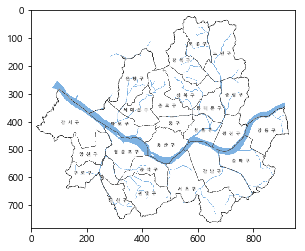

In [36]:
img=mpimg.imread('../raw data/서울지도.png')
plt.imshow(img)

위의 서울시지도를 배경으로 하고 경도와 위도를 각각 x축 y축으로 놓아 산점도를 표시할 것이다. 그림상의 픽셀과 위도 경도의 위치를 맞추기 위하여 특수한 공식으로 위도와 경도값을 바꾼다.

In [37]:
TotalData_sample_17 = TD_17.copy()
TotalData_sample_17['위도'] = ((max(TotalData_sample_17['위도'])-TotalData_sample_17['위도'])/
                          (max(TotalData_sample_17['위도'])-min(TotalData_sample_17['위도'])))*670+57
TotalData_sample_17['경도'] = ((TotalData_sample_17['경도']-min(TotalData_sample_17['경도']))/
                          (max(TotalData_sample_17['경도'])-min(TotalData_sample_17['경도'])))*815+90
TotalData_sample_17.head()

,구분,대여소번호,17_대여소명,대여소 주소,거치대수,위도,경도,17년_대여건수,17년_반납건수,17년_회수율,17년_하루평균대여
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5,438.145101,322.665758,1865,2128,2.63,10.30
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20,420.635035,332.870873,7492,6758,-7.34,41.39
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14,423.487661,333.698139,5494,5399,-0.95,30.35
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13,435.240807,342.711209,6147,4876,-12.71,33.96
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5,436.932259,342.361630,3920,3176,-7.44,21.66


In [38]:
TotalData_sample_18 = TD_18.copy()
TotalData_sample_18['위도'] = ((max(TotalData_sample_18['위도'])-TotalData_sample_18['위도'])/
                          (max(TotalData_sample_18['위도'])-min(TotalData_sample_18['위도'])))*670+57
TotalData_sample_18['경도'] = ((TotalData_sample_18['경도']-min(TotalData_sample_18['경도']))/
                          (max(TotalData_sample_18['경도'])-min(TotalData_sample_18['경도'])))*815+90
TotalData_sample_18.head()

,구분,대여소번호,18_대여소명,대여소 주소,거치대수,위도,경도,18년_대여건수,18년_반납건수,18년_회수율,18년_하루평균대여
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5,438.145101,320.417756,2263,2247,-0.16,12.50
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20,420.635035,330.524270,8735,8364,-3.71,48.26
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14,423.487661,331.343542,6111,5748,-3.63,33.76
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13,435.240807,340.269529,5835,5333,-5.02,32.24
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5,436.932259,339.923327,3692,3047,-6.45,20.40


#### 이용건수와 대여소 수의 증가률 비교

In [39]:
print('대여소 수')
print('2017년 : {}개'.format(len(list(TotalData_17.index)))) #대여소 수 
print('2018년 : {}개'.format(len(list(TotalData_18.index))),'\n')
print('대여소 수 증가률 : {}%'.format(round((len(list(TotalData_18.index))/len(list(TotalData_17.index))*100),2)))
print('-'*30,'\n')
print('이용건수')
print('2017년 : {}건'.format(sum(map(int,list(TotalData_17['17년_대여건수']))))) #이용건수
print('2018년 : {}건'.format(sum(map(int,list(TotalData_18['18년_대여건수'])))),'\n')
print('하루 평균 이용건수')
print('2017년 : {}건'.format(round(sum(map(int,list(TotalData_17['17년_대여건수'])))/181,2))) #하루 평균 이용건수
print('2018년 : {}건'.format(round(sum(map(int,list(TotalData_18['18년_대여건수'])))/181,2)),'\n')
print('이용건수 증가률 : {}%'.format(round((sum(map(int,list(TotalData_18['18년_대여건수'])))/sum(map(int,list(TotalData_17['17년_대여건수'])))*100),2)))

대여소 수
2017년 : 683개
2018년 : 1162개 

대여소 수 증가률 : 170.13%
------------------------------ 

이용건수
2017년 : 1584740건
2018년 : 3369049건 

하루 평균 이용건수
2017년 : 8755.47건
2018년 : 18613.53건 

이용건수 증가률 : 212.59%


위의 변환된 좌표값으로 지도에 대여소의 위치를 표시한다.

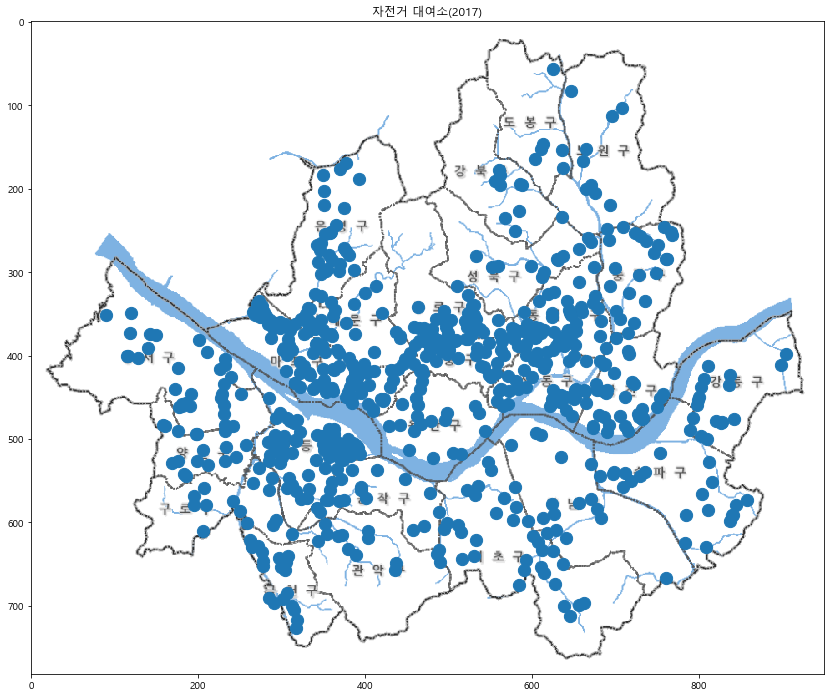

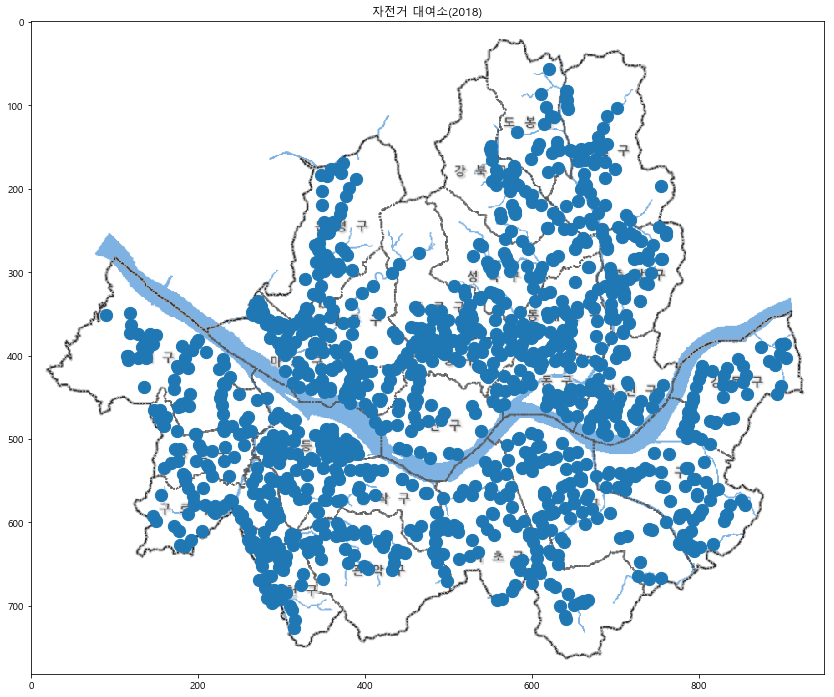

In [40]:
# 17년도 대여소 위치
t = TotalData_sample_17['위도']
y = TotalData_sample_17['경도']
plt.figure(figsize=(19,12))
plt.scatter(y,t,s=150)
plt.title('자전거 대여소(2017)')
plt.imshow(img)

# 18년도 대여소 위치
t = TotalData_sample_18['위도']
y = TotalData_sample_18['경도']
plt.figure(figsize=(19,12))
plt.scatter(y,t,s=150)
plt.title('자전거 대여소(2018)')
plt.imshow(img)
plt.show()

        그림만봐도 알 수 있듯이 지난 1년간 자전거 대여소의 수는 큰폭으로 늘었다. 실제로 자전거 대여소의 수는 전년대비 약 170.13% 증가하였다. 그림에서 보면 알 수 있듯이 2017년에 마포구, 서대문구, 중구, 동대문구, 용산구, 성동구등 중앙에 밀집되어 분포 되어있었다. 하지만 2018년에는 상대적으로 적었던 강북, 강남지역 까지 고르게 퍼진것을 알 수 있다.

        서울시에서 자전거 대여소의 수를 늘려 시민들이 따릉이를 수월하게 이용할 수 있도록 하였다는 것을 알 수 있다. 하지만 이용건수는 전년대비 약 212.59% 증가하였다. 대여소의 수보다 더 큰 폭으로 증가한 것이다. 그렇기 때문에 이러한 서울시의 노력에도 불구하고 자전거 부족현상을 해결하기는 역부족이었을 것이다. 

### 년도별 최대, 최소 대여건수 대여소 비교

#### 년도별 대여건수 상위 5개 대여소

In [41]:
TotalData_17 = TotalData_17.sort_values(by="17년_대여건수", ascending=False)
bmax_stop_17 = TotalData_17.iloc[0:10,[2,7]].reset_index(drop='True')
TotalData_18 = TotalData_18.sort_values(by="18년_대여건수", ascending=False)
bmax_stop_18 = TotalData_18.iloc[0:10,[2,7]].reset_index(drop='True')
Total_bmax = pd.concat([bmax_stop_17, bmax_stop_18], axis = 1)

Total_bmax.head()

,17_대여소명,17년_대여건수,18_대여소명,18년_대여건수
0,여의나루역 1번출구 앞,22845,여의나루역 1번출구 앞,29125
1,뚝섬유원지역 1번출구 앞,16420,뚝섬유원지역 1번출구 앞,22874
2,홍대입구역 2번출구 앞,16305,홍대입구역 2번출구 앞,20476
3,마포구민체육센터 앞,10120,롯데월드타워(잠실역2번출구 쪽),17365
4,합정역 7번출구 앞,9710,고속터미널역 8-1번 8-2번 출구 사이,15143


#### 년도별 대여건수 하위 5개 대여소

In [42]:
TotalData_17 = TotalData_17.sort_values(by="17년_대여건수", ascending=True)
bmin_stop_17 =  TotalData_17.iloc[0:10,[2,7]].reset_index(drop='True')
TotalData_18 = TotalData_18.sort_values(by="18년_대여건수", ascending=True)
bmin_stop_18 = TotalData_18.iloc[0:10,[2,7]].reset_index(drop='True')
Total_bmin = pd.concat([bmin_stop_17, bmin_stop_18], axis = 1)

Total_bmin.head()

,17_대여소명,17년_대여건수,18_대여소명,18년_대여건수
0,신대방삼거리역 3번출구쪽,0,탑성마을입구,71
1,마천CU우방점 앞,0,안골마을입구,71
2,에이스하이엔드타워8차 앞,0,능안마을입구,84
3,거여역 8번출구 뒤,0,강일동 에너지 마루,107
4,사육신공원앞,0,역삼동 sk뷰 501동앞,130


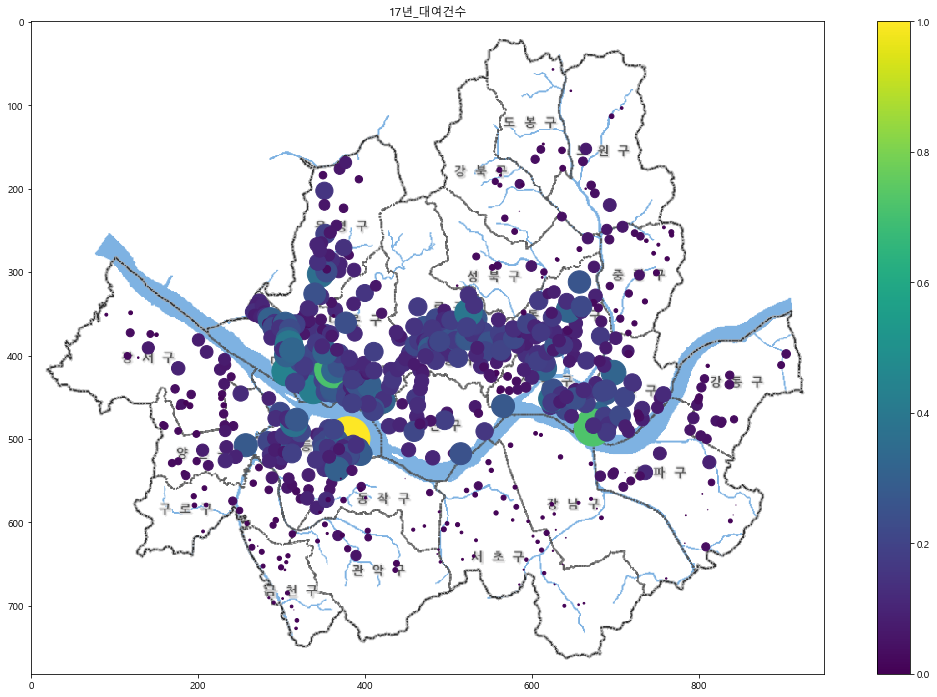

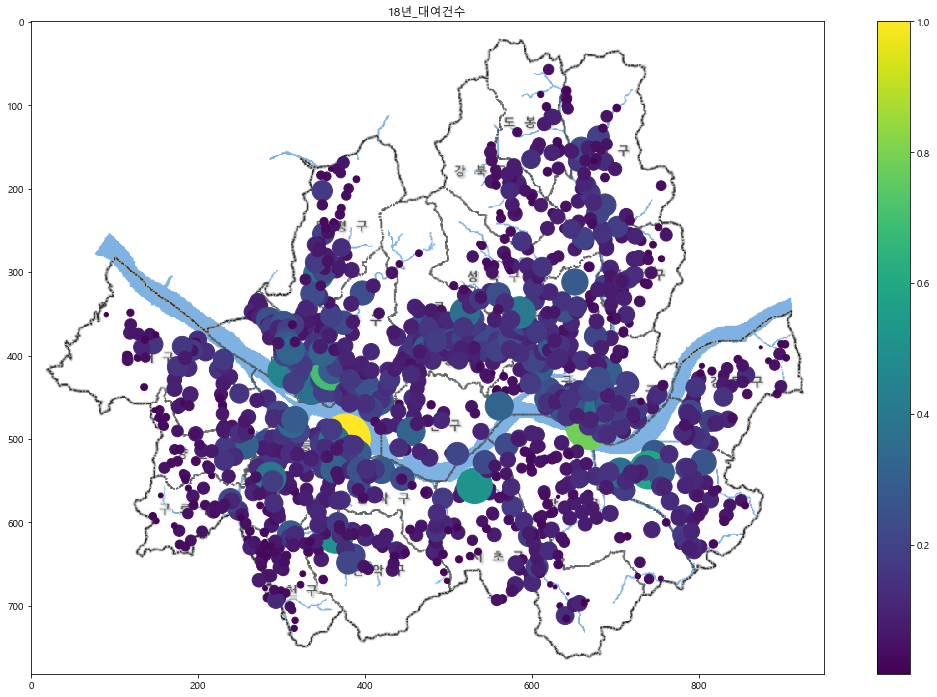

In [43]:
# 17년 상반기 대여건수
t = TotalData_sample_17['위도']
y = TotalData_sample_17['경도']
z = (TotalData_sample_17['17년_대여건수']/max(TotalData_sample_17['17년_대여건수'])) #대여건수간의 상대적크기를 알수 있게한다.
k = TotalData_sample_17['17년_대여건수']/12 #원의크기를 줄여 보기 편하게 한다.
plt.figure(figsize=(19,12))
plt.scatter(y,t,s=k,c=z)
plt.colorbar()
plt.title('17년_대여건수')
plt.imshow(img)

# 18년 상반기 대여건수
t = TotalData_sample_18['위도']
y = TotalData_sample_18['경도']
z = (TotalData_sample_18['18년_대여건수']/max(TotalData_sample_18['18년_대여건수']))
k = TotalData_sample_18['18년_대여건수']/12
plt.figure(figsize=(19,12))
plt.scatter(y,t,s=k,c=z)
plt.colorbar()
plt.title('18년_대여건수')
plt.imshow(img)
plt.show()